# 기본설정

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (13.2 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120899 files and direc

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

import geopandas as gpd
from shapely.geometry import Point, MultiPolygon
from pyproj import Transformer
import re

import os
os.chdir('/content/drive/MyDrive/dacon')

In [ ]:
# 컬럼 생략 없음
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# 컬러 팔레트
sns.set_palette("deep")

palette = sns.color_palette("deep")


# 데이터 불러오기

In [ ]:
train = pd.read_csv("./data/train.csv")

df_pds = gpd.read_file("./data/대구 빅데이터 마트 데이터/7. 안전/11. 보행자사고 다발지역/보행자사고 다발지역_100.gpkg")
df_old = gpd.read_file("./data/대구 빅데이터 마트 데이터/7. 안전/2. 보행노인사고 다발지역/보행노인사고 다발지역_100.gpkg")
df_wlk = gpd.read_file("./data/대구 빅데이터 마트 데이터/7. 안전/5. 보행자무단횡단사고 다발지역/보행자무단횡단사고 다발지역_100.gpkg")
df_ice = gpd.read_file("./data/대구 빅데이터 마트 데이터/7. 안전/8. 결빙사고 다발지역/결빙사고 다발지역 _100.gpkg")
df_trk = gpd.read_file("./data/대구 빅데이터 마트 데이터/7. 안전/9. 화물차사고 다발지역/화물차사고 다발지역_100.gpkg")

daegu = gpd.read_file('./data/hangjeongdong_대구광역시.geojson')

In [ ]:
print('pds info', df_pds.info())
print('old info', df_old.info())
print('wlk info', df_wlk.info())
print('ice info', df_ice.info())
print('trk info', df_trk.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   id                89316 non-null  int64   
 1   count             287 non-null    float64 
 2   occrrnc_cnt_sum   287 non-null    float64 
 3   occrrnc_cnt_mean  287 non-null    float64 
 4   caslt_cnt_sum     287 non-null    float64 
 5   caslt_cnt_mean    287 non-null    float64 
 6   dth_dnv_cnt_sum   287 non-null    float64 
 7   dth_dnv_cnt_mean  287 non-null    float64 
 8   se_dnv_cnt_sum    287 non-null    float64 
 9   se_dnv_cnt_mean   287 non-null    float64 
 10  sl_dnv_cnt_sum    287 non-null    float64 
 11  sl_dnv_cnt_mean   287 non-null    float64 
 12  wnd_dnv_cnt_sum   287 non-null    float64 
 13  wnd_dnv_cnt_mean  287 non-null    float64 
 14  geometry          89316 non-null  geometry
dtypes: float64(13), geometry(1), int64(1)
memory usage: 10.2 MB
pd

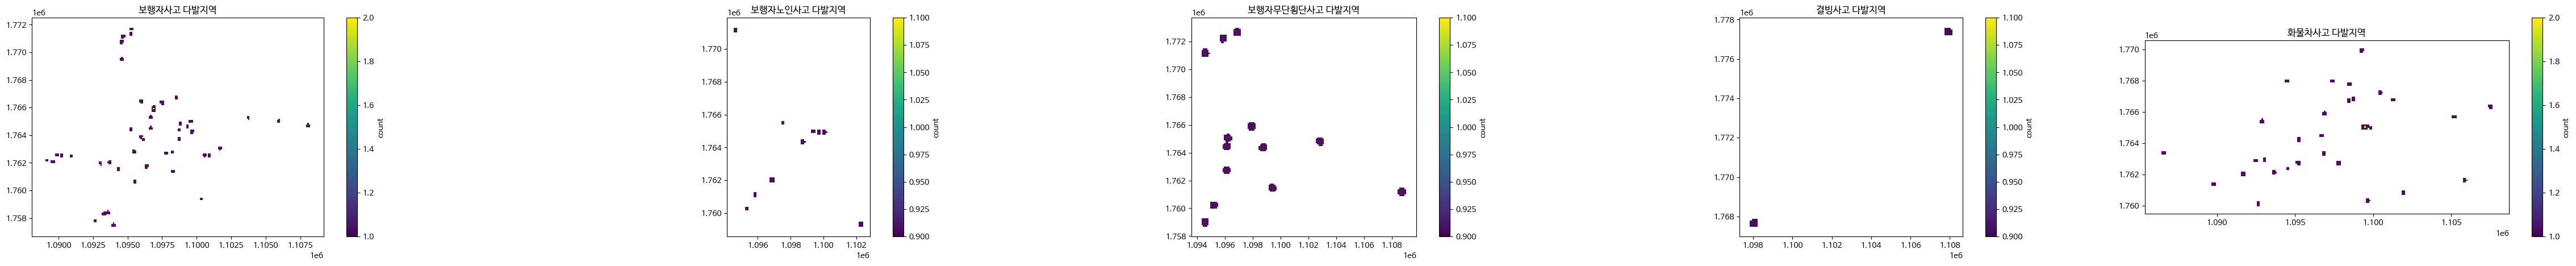

In [ ]:
# 시각화
fig, ax = plt.subplots(1, 5, figsize=(60, 5))
df_pds.plot(ax=ax[0], legend=True, legend_kwds={'label': "count"}, column='count', linewidth=0.05, edgecolor='0.8')
df_old.plot(ax=ax[1], legend=True, legend_kwds={'label': "count"}, column='count', linewidth=0.05, edgecolor='0.8')
df_wlk.plot(ax=ax[2], legend=True, legend_kwds={'label': "count"}, column='count', linewidth=0.05, edgecolor='0.8')
df_ice.plot(ax=ax[3], legend=True, legend_kwds={'label': "count"}, column='count', linewidth=0.05, edgecolor='0.8')
df_trk.plot(ax=ax[4], legend=True, legend_kwds={'label': "count"}, column='count', linewidth=0.05, edgecolor='0.8')

ax[0].set_title("보행자사고 다발지역")
ax[1].set_title("보행자노인사고 다발지역")
ax[2].set_title("보행자무단횡단사고 다발지역")
ax[3].set_title("결빙사고 다발지역")
ax[4].set_title("화물차사고 다발지역")

plt.show()

### 좌표 변환

In [ ]:
print("Daegy Bounds:", daegu.total_bounds)
print("df_pds Bounds:", df_pds.total_bounds)
print("df_old Bounds:", df_old.total_bounds)
print("df_wlk Bounds:", df_wlk.total_bounds)
print("df_ice Bounds:", df_ice.total_bounds)
print("df_trk Bounds:", df_trk.total_bounds)

Daegy Bounds: [128.35037289  35.60676579 128.76193784  36.01644624]
df_pds Bounds: [1077032.5416     1734852.72183504 1113966.38429075 1780587.41117014]
df_old Bounds: [1077032.5416     1734852.72183504 1113966.38429075 1780587.41117014]
df_wlk Bounds: [1077032.5416     1734852.72183504 1113966.38429075 1780587.41117014]
df_ice Bounds: [1077032.5416     1734852.72183504 1113966.38429075 1780587.41117014]
df_trk Bounds: [1077032.5416     1734852.72183504 1113966.38429075 1780587.41117014]


In [ ]:
dague_total_bounds = daegu.total_bounds

def change_bound(df):
    df = df.to_crs("EPSG:4326")
    df_total_bounds = df.total_bounds

    df['geometry'] = df['geometry'].translate(
        xoff=dague_total_bounds[0] - df_total_bounds[0],
        yoff=dague_total_bounds[1] - df_total_bounds[1]
    )

    print("Daegy Bounds:", daegu.total_bounds)
    print("df Bounds:", df.total_bounds)

    return df

df_pds1 = change_bound(df_pds)
df_old1 = change_bound(df_old)
df_wlk1 = change_bound(df_wlk)
df_ice1 = change_bound(df_ice)
df_trk1 = change_bound(df_trk)

Daegy Bounds: [128.35037289  35.60676579 128.76193784  36.01644624]
df Bounds: [128.35037289  35.60676579 128.76158985  36.016391  ]
Daegy Bounds: [128.35037289  35.60676579 128.76193784  36.01644624]
df Bounds: [128.35037289  35.60676579 128.76158985  36.016391  ]
Daegy Bounds: [128.35037289  35.60676579 128.76193784  36.01644624]
df Bounds: [128.35037289  35.60676579 128.76158985  36.016391  ]
Daegy Bounds: [128.35037289  35.60676579 128.76193784  36.01644624]
df Bounds: [128.35037289  35.60676579 128.76158985  36.016391  ]
Daegy Bounds: [128.35037289  35.60676579 128.76193784  36.01644624]
df Bounds: [128.35037289  35.60676579 128.76158985  36.016391  ]


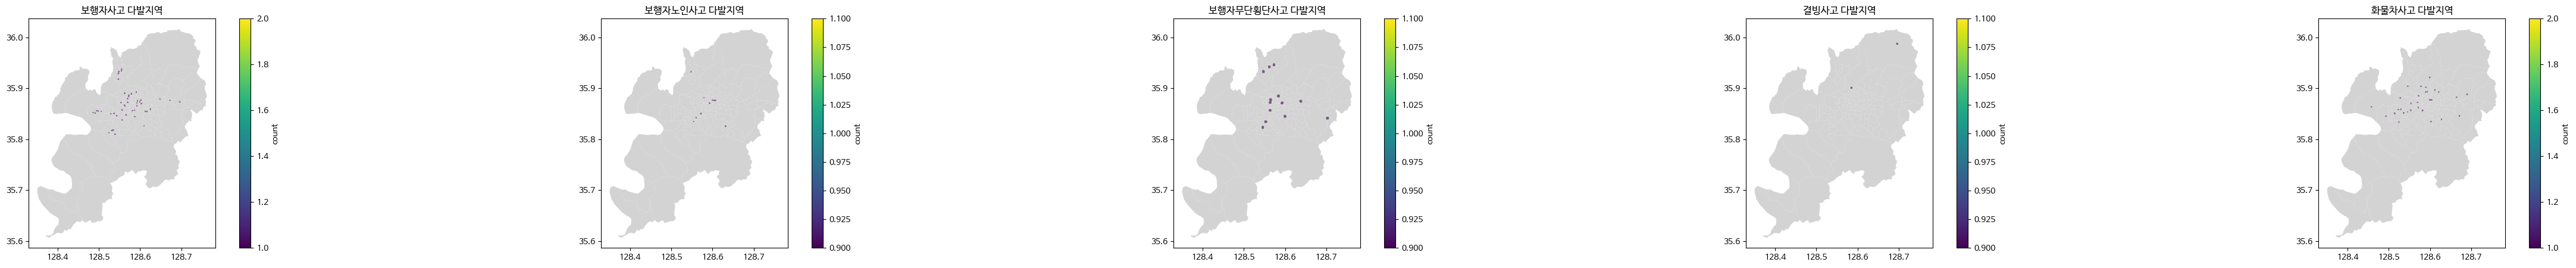

In [ ]:
# 시각화
fig, ax = plt.subplots(1, 5, figsize=(60, 5))
daegu.plot(ax=ax[0], color='lightgray')
df_pds1.plot(ax=ax[0], legend=True, legend_kwds={'label': "count"}, column='count', linewidth=0.05, edgecolor='0.8')

daegu.plot(ax=ax[1], color='lightgray')
df_old1.plot(ax=ax[1], legend=True, legend_kwds={'label': "count"}, column='count', linewidth=0.05, edgecolor='0.8')

daegu.plot(ax=ax[2], color='lightgray')
df_wlk1.plot(ax=ax[2], legend=True, legend_kwds={'label': "count"}, column='count', linewidth=0.05, edgecolor='0.8')

daegu.plot(ax=ax[3], color='lightgray')
df_ice1.plot(ax=ax[3], legend=True, legend_kwds={'label': "count"}, column='count', linewidth=0.05, edgecolor='0.8')

daegu.plot(ax=ax[4], color='lightgray')
df_trk1.plot(ax=ax[4], legend=True, legend_kwds={'label': "count"}, column='count', linewidth=0.05, edgecolor='0.8')

ax[0].set_title("보행자사고 다발지역")
ax[1].set_title("보행자노인사고 다발지역")
ax[2].set_title("보행자무단횡단사고 다발지역")
ax[3].set_title("결빙사고 다발지역")
ax[4].set_title("화물차사고 다발지역")

plt.show()

### 공간 정보 추가

In [ ]:
# sjoin을 사용하여 공간 조인 수행
merge_df_pds = gpd.sjoin(df_pds1, daegu, how='left', op='within')
merge_df_old = gpd.sjoin(df_old1, daegu, how='left', op='within')
merge_df_wlk = gpd.sjoin(df_wlk1, daegu, how='left', op='within')
merge_df_ice = gpd.sjoin(df_ice1, daegu, how='left', op='within')
merge_df_trk = gpd.sjoin(df_trk1, daegu, how='left', op='within')

# 결과 확인
display(merge_df_pds.head(1))
display(merge_df_old.head(1))
display(merge_df_wlk.head(1))
display(merge_df_ice.head(1))
display(merge_df_trk.head(1))

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate

,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,geometry,index_right,OBJECTID,adm_nm,adm_cd,adm_cd2,sgg,sido,sidonm,sggnm
0,349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((128.35120 35.70472, 128.35154 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,geometry,index_right,OBJECTID,adm_nm,adm_cd,adm_cd2,sgg,sido,sidonm,sggnm
0,349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((128.35120 35.70472, 128.35154 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,geometry,index_right,OBJECTID,adm_nm,adm_cd,adm_cd2,sgg,sido,sidonm,sggnm
0,349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((128.35120 35.70472, 128.35154 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,geometry,index_right,OBJECTID,adm_nm,adm_cd,adm_cd2,sgg,sido,sidonm,sggnm
0,349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((128.35120 35.70472, 128.35154 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,geometry,index_right,OBJECTID,adm_nm,adm_cd,adm_cd2,sgg,sido,sidonm,sggnm
0,349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((128.35120 35.70472, 128.35154 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
merge_df_pds = merge_df_pds.drop(['id','geometry','index_right', 'OBJECTID', 'adm_cd', 'adm_cd2', 'sgg', 'sido', 'sidonm', 'sggnm'],axis=1)
merge_df_old = merge_df_old.drop(['id','geometry','index_right', 'OBJECTID', 'adm_cd', 'adm_cd2', 'sgg', 'sido', 'sidonm', 'sggnm'],axis=1)
merge_df_wlk = merge_df_wlk.drop(['id','geometry','index_right', 'OBJECTID', 'adm_cd', 'adm_cd2', 'sgg', 'sido', 'sidonm', 'sggnm'],axis=1)
merge_df_ice = merge_df_ice.drop(['id','geometry','index_right', 'OBJECTID', 'adm_cd', 'adm_cd2', 'sgg', 'sido', 'sidonm', 'sggnm'],axis=1)
merge_df_trk = merge_df_trk.drop(['id','geometry','index_right', 'OBJECTID', 'adm_cd', 'adm_cd2', 'sgg', 'sido', 'sidonm', 'sggnm'],axis=1)

In [ ]:
merge_df_pds.columns

Index(['id', 'count', 'occrrnc_cnt_sum', 'occrrnc_cnt_mean', 'caslt_cnt_sum',
       'caslt_cnt_mean', 'dth_dnv_cnt_sum', 'dth_dnv_cnt_mean',
       'se_dnv_cnt_sum', 'se_dnv_cnt_mean', 'sl_dnv_cnt_sum',
       'sl_dnv_cnt_mean', 'wnd_dnv_cnt_sum', 'wnd_dnv_cnt_mean', 'adm_nm'],
      dtype='object')

In [ ]:
merge_df_pds = merge_df_pds.fillna(0)
merge_df_old = merge_df_old.fillna(0)
merge_df_wlk = merge_df_wlk.fillna(0)
merge_df_ice = merge_df_ice.fillna(0)
merge_df_trk = merge_df_trk.fillna(0)

In [ ]:
merge_df_pds['total'] = 1
merge_df_old['total'] = 1
merge_df_wlk['total'] = 1
merge_df_ice['total'] = 1
merge_df_trk['total'] = 1

In [ ]:
grouped_df_pds = merge_df_pds.groupby('adm_nm').sum()
grouped_df_old = merge_df_old.groupby('adm_nm').sum()
grouped_df_wlk = merge_df_wlk.groupby('adm_nm').sum()
grouped_df_ice = merge_df_ice.groupby('adm_nm').sum()
grouped_df_trk = merge_df_trk.groupby('adm_nm').sum()

In [ ]:
display(grouped_df_pds.head(1))
display(grouped_df_old.head(1))
display(grouped_df_wlk.head(1))
display(grouped_df_ice.head(1))
display(grouped_df_trk.head(1))

,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
adm_nm,,,,,,,,,,,,,,,
0,719245766,108.0,453.0,445.0,684.0,673.0,12.0,11.5,466.0,458.5,179.0,177.5,27.0,25.5,8625


,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
adm_nm,,,,,,,,,,,,,,,
0,719245766,24.0,130.0,130.0,143.0,143.0,4.0,4.0,129.0,129.0,8.0,8.0,2.0,2.0,8625


,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
adm_nm,,,,,,,,,,,,,,,
0,719245766,111.0,445.0,445.0,491.0,491.0,58.0,58.0,217.0,217.0,182.0,182.0,34.0,34.0,8625


,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
adm_nm,,,,,,,,,,,,,,,
0,719245766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8625


,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
adm_nm,,,,,,,,,,,,,,,
0,719245766,60.0,251.0,251.0,427.0,427.0,16.0,16.0,270.0,270.0,141.0,141.0,0.0,0.0,8625


In [ ]:
grouped_df_pds.reset_index(inplace=True)
grouped_df_old.reset_index(inplace=True)
grouped_df_wlk.reset_index(inplace=True)
grouped_df_ice.reset_index(inplace=True)
grouped_df_trk.reset_index(inplace=True)

In [ ]:
grouped_df_pds = grouped_df_pds[grouped_df_pds['adm_nm']!=0]
grouped_df_old = grouped_df_old[grouped_df_old['adm_nm']!=0]
grouped_df_wlk = grouped_df_wlk[grouped_df_wlk['adm_nm']!=0]
grouped_df_ice = grouped_df_ice[grouped_df_ice['adm_nm']!=0]
grouped_df_trk = grouped_df_trk[grouped_df_trk['adm_nm']!=0]

### 주소명 전처리

In [ ]:
def remove_num(x):
    if '수성1가동' in x:
        return '대구광역시 수성구 수성동1가'
    elif '수성2·3가동' in x:
        return '대구광역시 수성구 수성동2가'
    elif '수성4가동' in x:
        return '대구광역시 수성구 수성동4가'
    elif '불로·봉무동' in x:
        return '대구광역시 동구 불로동'
    elif '무태조야동' in x:
        return '대구광역시 동구 조야동'
    else:
        return re.sub(r'\d', '', x.replace('·',"").replace(',',""))

In [ ]:
grouped_df_pds['adm_nm'] = grouped_df_pds['adm_nm'].apply(remove_num)
grouped_df_old['adm_nm'] = grouped_df_old['adm_nm'].apply(remove_num)
grouped_df_wlk['adm_nm'] = grouped_df_wlk['adm_nm'].apply(remove_num)
grouped_df_ice['adm_nm'] = grouped_df_ice['adm_nm'].apply(remove_num)
grouped_df_trk['adm_nm'] = grouped_df_trk['adm_nm'].apply(remove_num)

In [ ]:
df_pds2 = grouped_df_pds.groupby('adm_nm').sum()
df_old2 = grouped_df_old.groupby('adm_nm').sum()
df_wlk2 = grouped_df_wlk.groupby('adm_nm').sum()
df_ice2 = grouped_df_ice.groupby('adm_nm').sum()
df_trk2 = grouped_df_trk.groupby('adm_nm').sum()

df_pds2.reset_index(inplace=True)
df_old2.reset_index(inplace=True)
df_wlk2.reset_index(inplace=True)
df_ice2.reset_index(inplace=True)
df_trk2.reset_index(inplace=True)

In [ ]:
def ga(df):
    # 북구 노원동 -> 1가 2가 3가
    df_nowon = df[df['시군구'] == '대구광역시 북구 노원동']
    df_nowon.loc[:,df_nowon.columns != '시군구'] = df_nowon.loc[:,df_nowon.columns != '시군구'].apply(lambda x: x/3)

    for ga in ['1가','2가','3가']:
        temp = df_nowon.copy(deep=True)
        temp['시군구'] = df_nowon['시군구'].apply(lambda x: x+ga)
        df = pd.concat([df,temp], ignore_index=True)
        display(df.tail(4))

    df = df[df['시군구'] != '대구광역시 북구 노원동']

    print('-'*50)

    # 북구 고성동 -> 1가 2가 3가
    df_gosung = df[df['시군구'] == '대구광역시 북구 고성동']
    df_gosung.loc[:,df_gosung.columns != '시군구'] = df_gosung.loc[:,df_gosung.columns != '시군구'].apply(lambda x: x/3)

    for ga in ['1가','2가','3가']:
        temp = df_gosung.copy(deep=True)
        temp['시군구'] = df_gosung['시군구'].apply(lambda x: x+ga)
        df = pd.concat([df,temp], ignore_index=True)
        display(df.tail(4))

    df = df[df['시군구'] != '대구광역시 북구 고성동']

    print('-'*50)

    # 북구 칠성동 -> 1가 2가
    df_chilsung = df[df['시군구'] == '대구광역시 북구 칠성동']
    df_chilsung.loc[:,df_chilsung.columns != '시군구'] = df_chilsung.loc[:,df_chilsung.columns != '시군구'].apply(lambda x: x/2)

    for ga in ['1가','2가']:
        temp = df_chilsung.copy(deep=True)
        temp['시군구'] = df_chilsung['시군구'].apply(lambda x: x+ga)
        df = pd.concat([df,temp], ignore_index=True)
        display(df.tail(4))

    df = df[df['시군구'] != '대구광역시 북구 칠성동']

    print('-'*50)

    # 서구 원대동 -> 1가 2가 3가
    df_seogu = df[df['시군구'] == '대구광역시 서구 원대동']
    df_seogu.loc[:,df_seogu.columns != '시군구'] = df_seogu.loc[:,df_seogu.columns != '시군구'].apply(lambda x: x/3)

    for ga in ['1가','2가','3가']:
        temp = df_seogu.copy(deep=True)
        temp['시군구'] = df_seogu['시군구'].apply(lambda x: x+ga)
        df = pd.concat([df,temp], ignore_index=True)
        display(df.tail(4))

    df = df[df['시군구'] != '대구광역시 서구 원대동']

    print('-'*50)

    # 중구 동인동 -> 1가 2가 3가 4가
    df_dongin = df[df['시군구'] == '대구광역시 중구 동인동']
    df_dongin.loc[:,df_dongin.columns != '시군구'] = df_dongin.loc[:,df_dongin.columns != '시군구'].apply(lambda x: x/4)

    for ga in ['1가','2가','3가']:
        temp = df_dongin.copy(deep=True)
        temp['시군구'] = df_dongin['시군구'].apply(lambda x: x+ga)
        df = pd.concat([df,temp], ignore_index=True)
        display(df.tail(4))

    df = df[df['시군구'] != '대구광역시 중구 동인동']

    print('-'*50)

    # 중구 삼덕동 -> 1가 2가 3가
    df_samduk = df[df['시군구'] == '대구광역시 중구 삼덕동']
    df_samduk.loc[:,df_samduk.columns != '시군구'] = df_samduk.loc[:,df_samduk.columns != '시군구'].apply(lambda x: x/3)

    for ga in ['1가','2가','3가']:
        temp = df_samduk.copy(deep=True)
        temp['시군구'] = df_samduk['시군구'].apply(lambda x: x+ga)
        df = pd.concat([df,temp], ignore_index=True)
        display(df.tail(4))

    df = df[df['시군구'] != '대구광역시 중구 삼덕동']

    print('-'*50)

    return df

In [ ]:
df_pds2.rename(columns={'adm_nm':'시군구'},inplace=True)
df_old2.rename(columns={'adm_nm':'시군구'},inplace=True)
df_wlk2.rename(columns={'adm_nm':'시군구'},inplace=True)
df_ice2.rename(columns={'adm_nm':'시군구'},inplace=True)
df_trk2.rename(columns={'adm_nm':'시군구'},inplace=True)

In [ ]:
df_pds2.columns

Index(['시군구', 'id', 'count', 'occrrnc_cnt_sum', 'occrrnc_cnt_mean',
       'caslt_cnt_sum', 'caslt_cnt_mean', 'dth_dnv_cnt_sum',
       'dth_dnv_cnt_mean', 'se_dnv_cnt_sum', 'se_dnv_cnt_mean',
       'sl_dnv_cnt_sum', 'sl_dnv_cnt_mean', 'wnd_dnv_cnt_sum',
       'wnd_dnv_cnt_mean', 'total'],
      dtype='object')

In [ ]:
df_pds3 = ga(df_pds2)
df_old3 = ga(df_old2)
df_wlk3 = ga(df_wlk2)
df_ice3 = ga(df_ice2)
df_trk3 = ga(df_trk2)

<ipython-input-35-8a7e6e7df8e7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nowon.loc[:,df_nowon.columns != '시군구'] = df_nowon.loc[:,df_nowon.columns != '시군구'].apply(lambda x: x/3)


,시군구,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
76,대구광역시 중구 동인동,7.697176e+06,8.000000,32.000000,32.000000,72.000000,72.000000,0.0,0.0,32.000000,32.000000,32.000000,32.000000,8.000000,8.000000,73.000000
77,대구광역시 중구 삼덕동,4.473684e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,43.000000
78,대구광역시 중구 성내동,1.628226e+07,13.000000,52.000000,52.000000,81.000000,81.000000,4.0,4.0,48.000000,48.000000,25.000000,25.000000,4.000000,4.000000,166.000000
79,대구광역시 북구 노원동1가,7.646686e+06,3.666667,14.666667,14.666667,24.666667,24.666667,0.0,0.0,14.666667,14.666667,6.333333,6.333333,3.666667,3.666667,85.333333


,시군구,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
77,대구광역시 중구 삼덕동,4.473684e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,43.000000
78,대구광역시 중구 성내동,1.628226e+07,13.000000,52.000000,52.000000,81.000000,81.000000,4.0,4.0,48.000000,48.000000,25.000000,25.000000,4.000000,4.000000,166.000000
79,대구광역시 북구 노원동1가,7.646686e+06,3.666667,14.666667,14.666667,24.666667,24.666667,0.0,0.0,14.666667,14.666667,6.333333,6.333333,3.666667,3.666667,85.333333
80,대구광역시 북구 노원동2가,7.646686e+06,3.666667,14.666667,14.666667,24.666667,24.666667,0.0,0.0,14.666667,14.666667,6.333333,6.333333,3.666667,3.666667,85.333333


,시군구,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
78,대구광역시 중구 성내동,1.628226e+07,13.000000,52.000000,52.000000,81.000000,81.000000,4.0,4.0,48.000000,48.000000,25.000000,25.000000,4.000000,4.000000,166.000000
79,대구광역시 북구 노원동1가,7.646686e+06,3.666667,14.666667,14.666667,24.666667,24.666667,0.0,0.0,14.666667,14.666667,6.333333,6.333333,3.666667,3.666667,85.333333
80,대구광역시 북구 노원동2가,7.646686e+06,3.666667,14.666667,14.666667,24.666667,24.666667,0.0,0.0,14.666667,14.666667,6.333333,6.333333,3.666667,3.666667,85.333333
81,대구광역시 북구 노원동3가,7.646686e+06,3.666667,14.666667,14.666667,24.666667,24.666667,0.0,0.0,14.666667,14.666667,6.333333,6.333333,3.666667,3.666667,85.333333


--------------------------------------------------


<ipython-input-35-8a7e6e7df8e7>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gosung.loc[:,df_gosung.columns != '시군구'] = df_gosung.loc[:,df_gosung.columns != '시군구'].apply(lambda x: x/3)


,시군구,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
78,대구광역시 북구 노원동1가,7.646686e+06,3.666667,14.666667,14.666667,24.666667,24.666667,0.0,0.0,14.666667,14.666667,6.333333,6.333333,3.666667,3.666667,85.333333
79,대구광역시 북구 노원동2가,7.646686e+06,3.666667,14.666667,14.666667,24.666667,24.666667,0.0,0.0,14.666667,14.666667,6.333333,6.333333,3.666667,3.666667,85.333333
80,대구광역시 북구 노원동3가,7.646686e+06,3.666667,14.666667,14.666667,24.666667,24.666667,0.0,0.0,14.666667,14.666667,6.333333,6.333333,3.666667,3.666667,85.333333
81,대구광역시 북구 고성동1가,1.122646e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.666667


,시군구,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
79,대구광역시 북구 노원동2가,7.646686e+06,3.666667,14.666667,14.666667,24.666667,24.666667,0.0,0.0,14.666667,14.666667,6.333333,6.333333,3.666667,3.666667,85.333333
80,대구광역시 북구 노원동3가,7.646686e+06,3.666667,14.666667,14.666667,24.666667,24.666667,0.0,0.0,14.666667,14.666667,6.333333,6.333333,3.666667,3.666667,85.333333
81,대구광역시 북구 고성동1가,1.122646e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.666667
82,대구광역시 북구 고성동2가,1.122646e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.666667


,시군구,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
80,대구광역시 북구 노원동3가,7.646686e+06,3.666667,14.666667,14.666667,24.666667,24.666667,0.0,0.0,14.666667,14.666667,6.333333,6.333333,3.666667,3.666667,85.333333
81,대구광역시 북구 고성동1가,1.122646e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.666667
82,대구광역시 북구 고성동2가,1.122646e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.666667
83,대구광역시 북구 고성동3가,1.122646e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.666667


--------------------------------------------------


<ipython-input-35-8a7e6e7df8e7>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chilsung.loc[:,df_chilsung.columns != '시군구'] = df_chilsung.loc[:,df_chilsung.columns != '시군구'].apply(lambda x: x/2)


,시군구,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
80,대구광역시 북구 고성동1가,1.122646e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.666667
81,대구광역시 북구 고성동2가,1.122646e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.666667
82,대구광역시 북구 고성동3가,1.122646e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.666667
83,대구광역시 북구 칠성동1가,4.852324e+06,3.0,15.0,15.0,18.0,18.0,0.0,0.0,15.0,15.0,3.0,3.0,0.0,0.0,48.000000


,시군구,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
81,대구광역시 북구 고성동2가,1.122646e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.666667
82,대구광역시 북구 고성동3가,1.122646e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.666667
83,대구광역시 북구 칠성동1가,4.852324e+06,3.0,15.0,15.0,18.0,18.0,0.0,0.0,15.0,15.0,3.0,3.0,0.0,0.0,48.000000
84,대구광역시 북구 칠성동2가,4.852324e+06,3.0,15.0,15.0,18.0,18.0,0.0,0.0,15.0,15.0,3.0,3.0,0.0,0.0,48.000000


--------------------------------------------------


<ipython-input-35-8a7e6e7df8e7>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seogu.loc[:,df_seogu.columns != '시군구'] = df_seogu.loc[:,df_seogu.columns != '시군구'].apply(lambda x: x/3)


,시군구,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
81,대구광역시 북구 고성동3가,1.122646e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.666667
82,대구광역시 북구 칠성동1가,4.852324e+06,3.0,15.0,15.0,18.0,18.0,0.0,0.0,15.0,15.0,3.0,3.0,0.0,0.0,48.000000
83,대구광역시 북구 칠성동2가,4.852324e+06,3.0,15.0,15.0,18.0,18.0,0.0,0.0,15.0,15.0,3.0,3.0,0.0,0.0,48.000000
84,대구광역시 서구 원대동1가,1.268098e+06,1.0,4.0,4.0,5.0,5.0,0.0,0.0,4.0,4.0,1.0,1.0,0.0,0.0,13.666667


,시군구,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
82,대구광역시 북구 칠성동1가,4852324.5,3.0,15.0,15.0,18.0,18.0,0.0,0.0,15.0,15.0,3.0,3.0,0.0,0.0,48.000000
83,대구광역시 북구 칠성동2가,4852324.5,3.0,15.0,15.0,18.0,18.0,0.0,0.0,15.0,15.0,3.0,3.0,0.0,0.0,48.000000
84,대구광역시 서구 원대동1가,1268098.0,1.0,4.0,4.0,5.0,5.0,0.0,0.0,4.0,4.0,1.0,1.0,0.0,0.0,13.666667
85,대구광역시 서구 원대동2가,1268098.0,1.0,4.0,4.0,5.0,5.0,0.0,0.0,4.0,4.0,1.0,1.0,0.0,0.0,13.666667


,시군구,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
83,대구광역시 북구 칠성동2가,4852324.5,3.0,15.0,15.0,18.0,18.0,0.0,0.0,15.0,15.0,3.0,3.0,0.0,0.0,48.000000
84,대구광역시 서구 원대동1가,1268098.0,1.0,4.0,4.0,5.0,5.0,0.0,0.0,4.0,4.0,1.0,1.0,0.0,0.0,13.666667
85,대구광역시 서구 원대동2가,1268098.0,1.0,4.0,4.0,5.0,5.0,0.0,0.0,4.0,4.0,1.0,1.0,0.0,0.0,13.666667
86,대구광역시 서구 원대동3가,1268098.0,1.0,4.0,4.0,5.0,5.0,0.0,0.0,4.0,4.0,1.0,1.0,0.0,0.0,13.666667


--------------------------------------------------


<ipython-input-35-8a7e6e7df8e7>:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dongin.loc[:,df_dongin.columns != '시군구'] = df_dongin.loc[:,df_dongin.columns != '시군구'].apply(lambda x: x/4)


,시군구,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
83,대구광역시 서구 원대동1가,1268098.0,1.0,4.0,4.0,5.0,5.0,0.0,0.0,4.0,4.0,1.0,1.0,0.0,0.0,13.666667
84,대구광역시 서구 원대동2가,1268098.0,1.0,4.0,4.0,5.0,5.0,0.0,0.0,4.0,4.0,1.0,1.0,0.0,0.0,13.666667
85,대구광역시 서구 원대동3가,1268098.0,1.0,4.0,4.0,5.0,5.0,0.0,0.0,4.0,4.0,1.0,1.0,0.0,0.0,13.666667
86,대구광역시 중구 동인동1가,1924294.0,2.0,8.0,8.0,18.0,18.0,0.0,0.0,8.0,8.0,8.0,8.0,2.0,2.0,18.250000


,시군구,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
84,대구광역시 서구 원대동2가,1268098.0,1.0,4.0,4.0,5.0,5.0,0.0,0.0,4.0,4.0,1.0,1.0,0.0,0.0,13.666667
85,대구광역시 서구 원대동3가,1268098.0,1.0,4.0,4.0,5.0,5.0,0.0,0.0,4.0,4.0,1.0,1.0,0.0,0.0,13.666667
86,대구광역시 중구 동인동1가,1924294.0,2.0,8.0,8.0,18.0,18.0,0.0,0.0,8.0,8.0,8.0,8.0,2.0,2.0,18.250000
87,대구광역시 중구 동인동2가,1924294.0,2.0,8.0,8.0,18.0,18.0,0.0,0.0,8.0,8.0,8.0,8.0,2.0,2.0,18.250000


,시군구,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
85,대구광역시 서구 원대동3가,1268098.0,1.0,4.0,4.0,5.0,5.0,0.0,0.0,4.0,4.0,1.0,1.0,0.0,0.0,13.666667
86,대구광역시 중구 동인동1가,1924294.0,2.0,8.0,8.0,18.0,18.0,0.0,0.0,8.0,8.0,8.0,8.0,2.0,2.0,18.250000
87,대구광역시 중구 동인동2가,1924294.0,2.0,8.0,8.0,18.0,18.0,0.0,0.0,8.0,8.0,8.0,8.0,2.0,2.0,18.250000
88,대구광역시 중구 동인동3가,1924294.0,2.0,8.0,8.0,18.0,18.0,0.0,0.0,8.0,8.0,8.0,8.0,2.0,2.0,18.250000


--------------------------------------------------


<ipython-input-35-8a7e6e7df8e7>:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_samduk.loc[:,df_samduk.columns != '시군구'] = df_samduk.loc[:,df_samduk.columns != '시군구'].apply(lambda x: x/3)


,시군구,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
85,대구광역시 중구 동인동1가,1924294.0,2.0,8.0,8.0,18.0,18.0,0.0,0.0,8.0,8.0,8.0,8.0,2.0,2.0,18.250000
86,대구광역시 중구 동인동2가,1924294.0,2.0,8.0,8.0,18.0,18.0,0.0,0.0,8.0,8.0,8.0,8.0,2.0,2.0,18.250000
87,대구광역시 중구 동인동3가,1924294.0,2.0,8.0,8.0,18.0,18.0,0.0,0.0,8.0,8.0,8.0,8.0,2.0,2.0,18.250000
88,대구광역시 중구 삼덕동1가,1491228.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.333333


,시군구,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
86,대구광역시 중구 동인동2가,1924294.0,2.0,8.0,8.0,18.0,18.0,0.0,0.0,8.0,8.0,8.0,8.0,2.0,2.0,18.250000
87,대구광역시 중구 동인동3가,1924294.0,2.0,8.0,8.0,18.0,18.0,0.0,0.0,8.0,8.0,8.0,8.0,2.0,2.0,18.250000
88,대구광역시 중구 삼덕동1가,1491228.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.333333
89,대구광역시 중구 삼덕동2가,1491228.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.333333


,시군구,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
87,대구광역시 중구 동인동3가,1924294.0,2.0,8.0,8.0,18.0,18.0,0.0,0.0,8.0,8.0,8.0,8.0,2.0,2.0,18.250000
88,대구광역시 중구 삼덕동1가,1491228.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.333333
89,대구광역시 중구 삼덕동2가,1491228.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.333333
90,대구광역시 중구 삼덕동3가,1491228.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.333333


--------------------------------------------------


<ipython-input-35-8a7e6e7df8e7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nowon.loc[:,df_nowon.columns != '시군구'] = df_nowon.loc[:,df_nowon.columns != '시군구'].apply(lambda x: x/3)


,시군구,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
76,대구광역시 중구 동인동,7.697176e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73.000000
77,대구광역시 중구 삼덕동,4.473684e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43.000000
78,대구광역시 중구 성내동,1.628226e+07,5.0,30.0,30.0,35.0,35.0,10.0,10.0,20.0,20.0,0.0,0.0,5.0,5.0,166.000000
79,대구광역시 북구 노원동1가,7.646686e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85.333333


,시군구,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
77,대구광역시 중구 삼덕동,4.473684e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43.000000
78,대구광역시 중구 성내동,1.628226e+07,5.0,30.0,30.0,35.0,35.0,10.0,10.0,20.0,20.0,0.0,0.0,5.0,5.0,166.000000
79,대구광역시 북구 노원동1가,7.646686e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85.333333
80,대구광역시 북구 노원동2가,7.646686e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85.333333


,시군구,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
78,대구광역시 중구 성내동,1.628226e+07,5.0,30.0,30.0,35.0,35.0,10.0,10.0,20.0,20.0,0.0,0.0,5.0,5.0,166.000000
79,대구광역시 북구 노원동1가,7.646686e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85.333333
80,대구광역시 북구 노원동2가,7.646686e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85.333333
81,대구광역시 북구 노원동3가,7.646686e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85.333333


--------------------------------------------------


<ipython-input-35-8a7e6e7df8e7>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gosung.loc[:,df_gosung.columns != '시군구'] = df_gosung.loc[:,df_gosung.columns != '시군구'].apply(lambda x: x/3)


,시군구,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
78,대구광역시 북구 노원동1가,7.646686e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85.333333
79,대구광역시 북구 노원동2가,7.646686e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85.333333
80,대구광역시 북구 노원동3가,7.646686e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85.333333
81,대구광역시 북구 고성동1가,1.122646e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.666667


,시군구,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
79,대구광역시 북구 노원동2가,7.646686e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85.333333
80,대구광역시 북구 노원동3가,7.646686e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85.333333
81,대구광역시 북구 고성동1가,1.122646e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.666667
82,대구광역시 북구 고성동2가,1.122646e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.666667


,시군구,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
80,대구광역시 북구 노원동3가,7.646686e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85.333333
81,대구광역시 북구 고성동1가,1.122646e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.666667
82,대구광역시 북구 고성동2가,1.122646e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.666667
83,대구광역시 북구 고성동3가,1.122646e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.666667


--------------------------------------------------


<ipython-input-35-8a7e6e7df8e7>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chilsung.loc[:,df_chilsung.columns != '시군구'] = df_chilsung.loc[:,df_chilsung.columns != '시군구'].apply(lambda x: x/2)


,시군구,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
80,대구광역시 북구 고성동1가,1.122646e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.666667
81,대구광역시 북구 고성동2가,1.122646e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.666667
82,대구광역시 북구 고성동3가,1.122646e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.666667
83,대구광역시 북구 칠성동1가,4.852324e+06,7.0,44.0,44.0,47.0,47.0,0.0,0.0,44.0,44.0,3.0,3.0,0.0,0.0,48.000000


,시군구,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
81,대구광역시 북구 고성동2가,1.122646e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.666667
82,대구광역시 북구 고성동3가,1.122646e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.666667
83,대구광역시 북구 칠성동1가,4.852324e+06,7.0,44.0,44.0,47.0,47.0,0.0,0.0,44.0,44.0,3.0,3.0,0.0,0.0,48.000000
84,대구광역시 북구 칠성동2가,4.852324e+06,7.0,44.0,44.0,47.0,47.0,0.0,0.0,44.0,44.0,3.0,3.0,0.0,0.0,48.000000


--------------------------------------------------


<ipython-input-35-8a7e6e7df8e7>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seogu.loc[:,df_seogu.columns != '시군구'] = df_seogu.loc[:,df_seogu.columns != '시군구'].apply(lambda x: x/3)


,시군구,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
81,대구광역시 북구 고성동3가,1.122646e+06,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,11.666667
82,대구광역시 북구 칠성동1가,4.852324e+06,7.000000,44.000000,44.000000,47.0,47.0,0.0,0.0,44.000000,44.000000,3.000000,3.000000,0.0,0.0,48.000000
83,대구광역시 북구 칠성동2가,4.852324e+06,7.000000,44.000000,44.000000,47.0,47.0,0.0,0.0,44.000000,44.000000,3.000000,3.000000,0.0,0.0,48.000000
84,대구광역시 서구 원대동1가,1.268098e+06,1.333333,6.666667,6.666667,8.0,8.0,0.0,0.0,6.666667,6.666667,1.333333,1.333333,0.0,0.0,13.666667


,시군구,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
82,대구광역시 북구 칠성동1가,4852324.5,7.000000,44.000000,44.000000,47.0,47.0,0.0,0.0,44.000000,44.000000,3.000000,3.000000,0.0,0.0,48.000000
83,대구광역시 북구 칠성동2가,4852324.5,7.000000,44.000000,44.000000,47.0,47.0,0.0,0.0,44.000000,44.000000,3.000000,3.000000,0.0,0.0,48.000000
84,대구광역시 서구 원대동1가,1268098.0,1.333333,6.666667,6.666667,8.0,8.0,0.0,0.0,6.666667,6.666667,1.333333,1.333333,0.0,0.0,13.666667
85,대구광역시 서구 원대동2가,1268098.0,1.333333,6.666667,6.666667,8.0,8.0,0.0,0.0,6.666667,6.666667,1.333333,1.333333,0.0,0.0,13.666667


,시군구,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
83,대구광역시 북구 칠성동2가,4852324.5,7.000000,44.000000,44.000000,47.0,47.0,0.0,0.0,44.000000,44.000000,3.000000,3.000000,0.0,0.0,48.000000
84,대구광역시 서구 원대동1가,1268098.0,1.333333,6.666667,6.666667,8.0,8.0,0.0,0.0,6.666667,6.666667,1.333333,1.333333,0.0,0.0,13.666667
85,대구광역시 서구 원대동2가,1268098.0,1.333333,6.666667,6.666667,8.0,8.0,0.0,0.0,6.666667,6.666667,1.333333,1.333333,0.0,0.0,13.666667
86,대구광역시 서구 원대동3가,1268098.0,1.333333,6.666667,6.666667,8.0,8.0,0.0,0.0,6.666667,6.666667,1.333333,1.333333,0.0,0.0,13.666667


--------------------------------------------------


<ipython-input-35-8a7e6e7df8e7>:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dongin.loc[:,df_dongin.columns != '시군구'] = df_dongin.loc[:,df_dongin.columns != '시군구'].apply(lambda x: x/4)


,시군구,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
83,대구광역시 서구 원대동1가,1268098.0,1.333333,6.666667,6.666667,8.0,8.0,0.0,0.0,6.666667,6.666667,1.333333,1.333333,0.0,0.0,13.666667
84,대구광역시 서구 원대동2가,1268098.0,1.333333,6.666667,6.666667,8.0,8.0,0.0,0.0,6.666667,6.666667,1.333333,1.333333,0.0,0.0,13.666667
85,대구광역시 서구 원대동3가,1268098.0,1.333333,6.666667,6.666667,8.0,8.0,0.0,0.0,6.666667,6.666667,1.333333,1.333333,0.0,0.0,13.666667
86,대구광역시 중구 동인동1가,1924294.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,18.250000


,시군구,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
84,대구광역시 서구 원대동2가,1268098.0,1.333333,6.666667,6.666667,8.0,8.0,0.0,0.0,6.666667,6.666667,1.333333,1.333333,0.0,0.0,13.666667
85,대구광역시 서구 원대동3가,1268098.0,1.333333,6.666667,6.666667,8.0,8.0,0.0,0.0,6.666667,6.666667,1.333333,1.333333,0.0,0.0,13.666667
86,대구광역시 중구 동인동1가,1924294.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,18.250000
87,대구광역시 중구 동인동2가,1924294.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,18.250000


,시군구,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
85,대구광역시 서구 원대동3가,1268098.0,1.333333,6.666667,6.666667,8.0,8.0,0.0,0.0,6.666667,6.666667,1.333333,1.333333,0.0,0.0,13.666667
86,대구광역시 중구 동인동1가,1924294.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,18.250000
87,대구광역시 중구 동인동2가,1924294.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,18.250000
88,대구광역시 중구 동인동3가,1924294.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,18.250000


--------------------------------------------------


<ipython-input-35-8a7e6e7df8e7>:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_samduk.loc[:,df_samduk.columns != '시군구'] = df_samduk.loc[:,df_samduk.columns != '시군구'].apply(lambda x: x/3)


,시군구,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
85,대구광역시 중구 동인동1가,1924294.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.250000
86,대구광역시 중구 동인동2가,1924294.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.250000
87,대구광역시 중구 동인동3가,1924294.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.250000
88,대구광역시 중구 삼덕동1가,1491228.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.333333


,시군구,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
86,대구광역시 중구 동인동2가,1924294.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.250000
87,대구광역시 중구 동인동3가,1924294.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.250000
88,대구광역시 중구 삼덕동1가,1491228.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.333333
89,대구광역시 중구 삼덕동2가,1491228.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.333333


,시군구,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
87,대구광역시 중구 동인동3가,1924294.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.250000
88,대구광역시 중구 삼덕동1가,1491228.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.333333
89,대구광역시 중구 삼덕동2가,1491228.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.333333
90,대구광역시 중구 삼덕동3가,1491228.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.333333


--------------------------------------------------


<ipython-input-35-8a7e6e7df8e7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nowon.loc[:,df_nowon.columns != '시군구'] = df_nowon.loc[:,df_nowon.columns != '시군구'].apply(lambda x: x/3)


,시군구,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
76,대구광역시 중구 동인동,7.697176e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,73.000000
77,대구광역시 중구 삼덕동,4.473684e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,43.000000
78,대구광역시 중구 성내동,1.628226e+07,23.000000,115.000000,115.000000,161.000000,161.000000,23.0,23.0,46.0,46.0,46.000000,46.000000,46.0,46.0,166.000000
79,대구광역시 북구 노원동1가,7.646686e+06,0.333333,1.333333,1.333333,1.333333,1.333333,0.0,0.0,1.0,1.0,0.333333,0.333333,0.0,0.0,85.333333


,시군구,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
77,대구광역시 중구 삼덕동,4.473684e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,43.000000
78,대구광역시 중구 성내동,1.628226e+07,23.000000,115.000000,115.000000,161.000000,161.000000,23.0,23.0,46.0,46.0,46.000000,46.000000,46.0,46.0,166.000000
79,대구광역시 북구 노원동1가,7.646686e+06,0.333333,1.333333,1.333333,1.333333,1.333333,0.0,0.0,1.0,1.0,0.333333,0.333333,0.0,0.0,85.333333
80,대구광역시 북구 노원동2가,7.646686e+06,0.333333,1.333333,1.333333,1.333333,1.333333,0.0,0.0,1.0,1.0,0.333333,0.333333,0.0,0.0,85.333333


,시군구,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
78,대구광역시 중구 성내동,1.628226e+07,23.000000,115.000000,115.000000,161.000000,161.000000,23.0,23.0,46.0,46.0,46.000000,46.000000,46.0,46.0,166.000000
79,대구광역시 북구 노원동1가,7.646686e+06,0.333333,1.333333,1.333333,1.333333,1.333333,0.0,0.0,1.0,1.0,0.333333,0.333333,0.0,0.0,85.333333
80,대구광역시 북구 노원동2가,7.646686e+06,0.333333,1.333333,1.333333,1.333333,1.333333,0.0,0.0,1.0,1.0,0.333333,0.333333,0.0,0.0,85.333333
81,대구광역시 북구 노원동3가,7.646686e+06,0.333333,1.333333,1.333333,1.333333,1.333333,0.0,0.0,1.0,1.0,0.333333,0.333333,0.0,0.0,85.333333


--------------------------------------------------


<ipython-input-35-8a7e6e7df8e7>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gosung.loc[:,df_gosung.columns != '시군구'] = df_gosung.loc[:,df_gosung.columns != '시군구'].apply(lambda x: x/3)


,시군구,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
78,대구광역시 북구 노원동1가,7.646686e+06,0.333333,1.333333,1.333333,1.333333,1.333333,0.0,0.0,1.0,1.0,0.333333,0.333333,0.0,0.0,85.333333
79,대구광역시 북구 노원동2가,7.646686e+06,0.333333,1.333333,1.333333,1.333333,1.333333,0.0,0.0,1.0,1.0,0.333333,0.333333,0.0,0.0,85.333333
80,대구광역시 북구 노원동3가,7.646686e+06,0.333333,1.333333,1.333333,1.333333,1.333333,0.0,0.0,1.0,1.0,0.333333,0.333333,0.0,0.0,85.333333
81,대구광역시 북구 고성동1가,1.122646e+06,2.666667,10.666667,10.666667,10.666667,10.666667,0.0,0.0,8.0,8.0,2.666667,2.666667,0.0,0.0,11.666667


,시군구,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
79,대구광역시 북구 노원동2가,7.646686e+06,0.333333,1.333333,1.333333,1.333333,1.333333,0.0,0.0,1.0,1.0,0.333333,0.333333,0.0,0.0,85.333333
80,대구광역시 북구 노원동3가,7.646686e+06,0.333333,1.333333,1.333333,1.333333,1.333333,0.0,0.0,1.0,1.0,0.333333,0.333333,0.0,0.0,85.333333
81,대구광역시 북구 고성동1가,1.122646e+06,2.666667,10.666667,10.666667,10.666667,10.666667,0.0,0.0,8.0,8.0,2.666667,2.666667,0.0,0.0,11.666667
82,대구광역시 북구 고성동2가,1.122646e+06,2.666667,10.666667,10.666667,10.666667,10.666667,0.0,0.0,8.0,8.0,2.666667,2.666667,0.0,0.0,11.666667


,시군구,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
80,대구광역시 북구 노원동3가,7.646686e+06,0.333333,1.333333,1.333333,1.333333,1.333333,0.0,0.0,1.0,1.0,0.333333,0.333333,0.0,0.0,85.333333
81,대구광역시 북구 고성동1가,1.122646e+06,2.666667,10.666667,10.666667,10.666667,10.666667,0.0,0.0,8.0,8.0,2.666667,2.666667,0.0,0.0,11.666667
82,대구광역시 북구 고성동2가,1.122646e+06,2.666667,10.666667,10.666667,10.666667,10.666667,0.0,0.0,8.0,8.0,2.666667,2.666667,0.0,0.0,11.666667
83,대구광역시 북구 고성동3가,1.122646e+06,2.666667,10.666667,10.666667,10.666667,10.666667,0.0,0.0,8.0,8.0,2.666667,2.666667,0.0,0.0,11.666667


--------------------------------------------------


<ipython-input-35-8a7e6e7df8e7>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chilsung.loc[:,df_chilsung.columns != '시군구'] = df_chilsung.loc[:,df_chilsung.columns != '시군구'].apply(lambda x: x/2)


,시군구,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
80,대구광역시 북구 고성동1가,1.122646e+06,2.666667,10.666667,10.666667,10.666667,10.666667,0.0,0.0,8.0,8.0,2.666667,2.666667,0.0,0.0,11.666667
81,대구광역시 북구 고성동2가,1.122646e+06,2.666667,10.666667,10.666667,10.666667,10.666667,0.0,0.0,8.0,8.0,2.666667,2.666667,0.0,0.0,11.666667
82,대구광역시 북구 고성동3가,1.122646e+06,2.666667,10.666667,10.666667,10.666667,10.666667,0.0,0.0,8.0,8.0,2.666667,2.666667,0.0,0.0,11.666667
83,대구광역시 북구 칠성동1가,4.852324e+06,0.500000,2.000000,2.000000,2.000000,2.000000,0.0,0.0,1.5,1.5,0.500000,0.500000,0.0,0.0,48.000000


,시군구,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
81,대구광역시 북구 고성동2가,1.122646e+06,2.666667,10.666667,10.666667,10.666667,10.666667,0.0,0.0,8.0,8.0,2.666667,2.666667,0.0,0.0,11.666667
82,대구광역시 북구 고성동3가,1.122646e+06,2.666667,10.666667,10.666667,10.666667,10.666667,0.0,0.0,8.0,8.0,2.666667,2.666667,0.0,0.0,11.666667
83,대구광역시 북구 칠성동1가,4.852324e+06,0.500000,2.000000,2.000000,2.000000,2.000000,0.0,0.0,1.5,1.5,0.500000,0.500000,0.0,0.0,48.000000
84,대구광역시 북구 칠성동2가,4.852324e+06,0.500000,2.000000,2.000000,2.000000,2.000000,0.0,0.0,1.5,1.5,0.500000,0.500000,0.0,0.0,48.000000


--------------------------------------------------


<ipython-input-35-8a7e6e7df8e7>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seogu.loc[:,df_seogu.columns != '시군구'] = df_seogu.loc[:,df_seogu.columns != '시군구'].apply(lambda x: x/3)


,시군구,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
81,대구광역시 북구 고성동3가,1.122646e+06,2.666667,10.666667,10.666667,10.666667,10.666667,0.0,0.0,8.0,8.0,2.666667,2.666667,0.0,0.0,11.666667
82,대구광역시 북구 칠성동1가,4.852324e+06,0.500000,2.000000,2.000000,2.000000,2.000000,0.0,0.0,1.5,1.5,0.500000,0.500000,0.0,0.0,48.000000
83,대구광역시 북구 칠성동2가,4.852324e+06,0.500000,2.000000,2.000000,2.000000,2.000000,0.0,0.0,1.5,1.5,0.500000,0.500000,0.0,0.0,48.000000
84,대구광역시 서구 원대동1가,1.268098e+06,0.333333,1.333333,1.333333,1.333333,1.333333,0.0,0.0,1.0,1.0,0.333333,0.333333,0.0,0.0,13.666667


,시군구,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
82,대구광역시 북구 칠성동1가,4852324.5,0.500000,2.000000,2.000000,2.000000,2.000000,0.0,0.0,1.5,1.5,0.500000,0.500000,0.0,0.0,48.000000
83,대구광역시 북구 칠성동2가,4852324.5,0.500000,2.000000,2.000000,2.000000,2.000000,0.0,0.0,1.5,1.5,0.500000,0.500000,0.0,0.0,48.000000
84,대구광역시 서구 원대동1가,1268098.0,0.333333,1.333333,1.333333,1.333333,1.333333,0.0,0.0,1.0,1.0,0.333333,0.333333,0.0,0.0,13.666667
85,대구광역시 서구 원대동2가,1268098.0,0.333333,1.333333,1.333333,1.333333,1.333333,0.0,0.0,1.0,1.0,0.333333,0.333333,0.0,0.0,13.666667


,시군구,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
83,대구광역시 북구 칠성동2가,4852324.5,0.500000,2.000000,2.000000,2.000000,2.000000,0.0,0.0,1.5,1.5,0.500000,0.500000,0.0,0.0,48.000000
84,대구광역시 서구 원대동1가,1268098.0,0.333333,1.333333,1.333333,1.333333,1.333333,0.0,0.0,1.0,1.0,0.333333,0.333333,0.0,0.0,13.666667
85,대구광역시 서구 원대동2가,1268098.0,0.333333,1.333333,1.333333,1.333333,1.333333,0.0,0.0,1.0,1.0,0.333333,0.333333,0.0,0.0,13.666667
86,대구광역시 서구 원대동3가,1268098.0,0.333333,1.333333,1.333333,1.333333,1.333333,0.0,0.0,1.0,1.0,0.333333,0.333333,0.0,0.0,13.666667


--------------------------------------------------


<ipython-input-35-8a7e6e7df8e7>:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dongin.loc[:,df_dongin.columns != '시군구'] = df_dongin.loc[:,df_dongin.columns != '시군구'].apply(lambda x: x/4)


,시군구,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
83,대구광역시 서구 원대동1가,1268098.0,0.333333,1.333333,1.333333,1.333333,1.333333,0.0,0.0,1.0,1.0,0.333333,0.333333,0.0,0.0,13.666667
84,대구광역시 서구 원대동2가,1268098.0,0.333333,1.333333,1.333333,1.333333,1.333333,0.0,0.0,1.0,1.0,0.333333,0.333333,0.0,0.0,13.666667
85,대구광역시 서구 원대동3가,1268098.0,0.333333,1.333333,1.333333,1.333333,1.333333,0.0,0.0,1.0,1.0,0.333333,0.333333,0.0,0.0,13.666667
86,대구광역시 중구 동인동1가,1924294.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,18.250000


,시군구,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
84,대구광역시 서구 원대동2가,1268098.0,0.333333,1.333333,1.333333,1.333333,1.333333,0.0,0.0,1.0,1.0,0.333333,0.333333,0.0,0.0,13.666667
85,대구광역시 서구 원대동3가,1268098.0,0.333333,1.333333,1.333333,1.333333,1.333333,0.0,0.0,1.0,1.0,0.333333,0.333333,0.0,0.0,13.666667
86,대구광역시 중구 동인동1가,1924294.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,18.250000
87,대구광역시 중구 동인동2가,1924294.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,18.250000


,시군구,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
85,대구광역시 서구 원대동3가,1268098.0,0.333333,1.333333,1.333333,1.333333,1.333333,0.0,0.0,1.0,1.0,0.333333,0.333333,0.0,0.0,13.666667
86,대구광역시 중구 동인동1가,1924294.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,18.250000
87,대구광역시 중구 동인동2가,1924294.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,18.250000
88,대구광역시 중구 동인동3가,1924294.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,18.250000


--------------------------------------------------


<ipython-input-35-8a7e6e7df8e7>:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_samduk.loc[:,df_samduk.columns != '시군구'] = df_samduk.loc[:,df_samduk.columns != '시군구'].apply(lambda x: x/3)


,시군구,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
85,대구광역시 중구 동인동1가,1924294.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.250000
86,대구광역시 중구 동인동2가,1924294.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.250000
87,대구광역시 중구 동인동3가,1924294.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.250000
88,대구광역시 중구 삼덕동1가,1491228.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.333333


,시군구,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
86,대구광역시 중구 동인동2가,1924294.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.250000
87,대구광역시 중구 동인동3가,1924294.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.250000
88,대구광역시 중구 삼덕동1가,1491228.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.333333
89,대구광역시 중구 삼덕동2가,1491228.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.333333


,시군구,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
87,대구광역시 중구 동인동3가,1924294.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.250000
88,대구광역시 중구 삼덕동1가,1491228.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.333333
89,대구광역시 중구 삼덕동2가,1491228.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.333333
90,대구광역시 중구 삼덕동3가,1491228.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.333333


--------------------------------------------------


<ipython-input-35-8a7e6e7df8e7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nowon.loc[:,df_nowon.columns != '시군구'] = df_nowon.loc[:,df_nowon.columns != '시군구'].apply(lambda x: x/3)


,시군구,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
76,대구광역시 중구 동인동,7.697176e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73.000000
77,대구광역시 중구 삼덕동,4.473684e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43.000000
78,대구광역시 중구 성내동,1.628226e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,166.000000
79,대구광역시 북구 노원동1가,7.646686e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85.333333


,시군구,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
77,대구광역시 중구 삼덕동,4.473684e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43.000000
78,대구광역시 중구 성내동,1.628226e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,166.000000
79,대구광역시 북구 노원동1가,7.646686e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85.333333
80,대구광역시 북구 노원동2가,7.646686e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85.333333


,시군구,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
78,대구광역시 중구 성내동,1.628226e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,166.000000
79,대구광역시 북구 노원동1가,7.646686e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85.333333
80,대구광역시 북구 노원동2가,7.646686e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85.333333
81,대구광역시 북구 노원동3가,7.646686e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85.333333


--------------------------------------------------


<ipython-input-35-8a7e6e7df8e7>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gosung.loc[:,df_gosung.columns != '시군구'] = df_gosung.loc[:,df_gosung.columns != '시군구'].apply(lambda x: x/3)


,시군구,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
78,대구광역시 북구 노원동1가,7.646686e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85.333333
79,대구광역시 북구 노원동2가,7.646686e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85.333333
80,대구광역시 북구 노원동3가,7.646686e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85.333333
81,대구광역시 북구 고성동1가,1.122646e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.666667


,시군구,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
79,대구광역시 북구 노원동2가,7.646686e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85.333333
80,대구광역시 북구 노원동3가,7.646686e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85.333333
81,대구광역시 북구 고성동1가,1.122646e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.666667
82,대구광역시 북구 고성동2가,1.122646e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.666667


,시군구,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
80,대구광역시 북구 노원동3가,7.646686e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85.333333
81,대구광역시 북구 고성동1가,1.122646e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.666667
82,대구광역시 북구 고성동2가,1.122646e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.666667
83,대구광역시 북구 고성동3가,1.122646e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.666667


<ipython-input-35-8a7e6e7df8e7>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chilsung.loc[:,df_chilsung.columns != '시군구'] = df_chilsung.loc[:,df_chilsung.columns != '시군구'].apply(lambda x: x/2)


--------------------------------------------------


,시군구,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
80,대구광역시 북구 고성동1가,1.122646e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.666667
81,대구광역시 북구 고성동2가,1.122646e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.666667
82,대구광역시 북구 고성동3가,1.122646e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.666667
83,대구광역시 북구 칠성동1가,4.852324e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.000000


,시군구,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
81,대구광역시 북구 고성동2가,1.122646e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.666667
82,대구광역시 북구 고성동3가,1.122646e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.666667
83,대구광역시 북구 칠성동1가,4.852324e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.000000
84,대구광역시 북구 칠성동2가,4.852324e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.000000


--------------------------------------------------


<ipython-input-35-8a7e6e7df8e7>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seogu.loc[:,df_seogu.columns != '시군구'] = df_seogu.loc[:,df_seogu.columns != '시군구'].apply(lambda x: x/3)


,시군구,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
81,대구광역시 북구 고성동3가,1.122646e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.666667
82,대구광역시 북구 칠성동1가,4.852324e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.000000
83,대구광역시 북구 칠성동2가,4.852324e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.000000
84,대구광역시 서구 원대동1가,1.268098e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.666667


,시군구,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
82,대구광역시 북구 칠성동1가,4852324.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.000000
83,대구광역시 북구 칠성동2가,4852324.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.000000
84,대구광역시 서구 원대동1가,1268098.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.666667
85,대구광역시 서구 원대동2가,1268098.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.666667


,시군구,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
83,대구광역시 북구 칠성동2가,4852324.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.000000
84,대구광역시 서구 원대동1가,1268098.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.666667
85,대구광역시 서구 원대동2가,1268098.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.666667
86,대구광역시 서구 원대동3가,1268098.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.666667


--------------------------------------------------


<ipython-input-35-8a7e6e7df8e7>:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dongin.loc[:,df_dongin.columns != '시군구'] = df_dongin.loc[:,df_dongin.columns != '시군구'].apply(lambda x: x/4)


,시군구,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
83,대구광역시 서구 원대동1가,1268098.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.666667
84,대구광역시 서구 원대동2가,1268098.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.666667
85,대구광역시 서구 원대동3가,1268098.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.666667
86,대구광역시 중구 동인동1가,1924294.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.250000


,시군구,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
84,대구광역시 서구 원대동2가,1268098.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.666667
85,대구광역시 서구 원대동3가,1268098.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.666667
86,대구광역시 중구 동인동1가,1924294.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.250000
87,대구광역시 중구 동인동2가,1924294.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.250000


,시군구,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
85,대구광역시 서구 원대동3가,1268098.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.666667
86,대구광역시 중구 동인동1가,1924294.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.250000
87,대구광역시 중구 동인동2가,1924294.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.250000
88,대구광역시 중구 동인동3가,1924294.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.250000


--------------------------------------------------


<ipython-input-35-8a7e6e7df8e7>:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_samduk.loc[:,df_samduk.columns != '시군구'] = df_samduk.loc[:,df_samduk.columns != '시군구'].apply(lambda x: x/3)


,시군구,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
85,대구광역시 중구 동인동1가,1924294.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.250000
86,대구광역시 중구 동인동2가,1924294.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.250000
87,대구광역시 중구 동인동3가,1924294.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.250000
88,대구광역시 중구 삼덕동1가,1491228.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.333333


,시군구,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
86,대구광역시 중구 동인동2가,1924294.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.250000
87,대구광역시 중구 동인동3가,1924294.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.250000
88,대구광역시 중구 삼덕동1가,1491228.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.333333
89,대구광역시 중구 삼덕동2가,1491228.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.333333


,시군구,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
87,대구광역시 중구 동인동3가,1924294.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.250000
88,대구광역시 중구 삼덕동1가,1491228.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.333333
89,대구광역시 중구 삼덕동2가,1491228.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.333333
90,대구광역시 중구 삼덕동3가,1491228.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.333333


--------------------------------------------------


<ipython-input-35-8a7e6e7df8e7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nowon.loc[:,df_nowon.columns != '시군구'] = df_nowon.loc[:,df_nowon.columns != '시군구'].apply(lambda x: x/3)


,시군구,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
76,대구광역시 중구 동인동,7.697176e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73.000000
77,대구광역시 중구 삼덕동,4.473684e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43.000000
78,대구광역시 중구 성내동,1.628226e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,166.000000
79,대구광역시 북구 노원동1가,7.646686e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85.333333


,시군구,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
77,대구광역시 중구 삼덕동,4.473684e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43.000000
78,대구광역시 중구 성내동,1.628226e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,166.000000
79,대구광역시 북구 노원동1가,7.646686e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85.333333
80,대구광역시 북구 노원동2가,7.646686e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85.333333


,시군구,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
78,대구광역시 중구 성내동,1.628226e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,166.000000
79,대구광역시 북구 노원동1가,7.646686e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85.333333
80,대구광역시 북구 노원동2가,7.646686e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85.333333
81,대구광역시 북구 노원동3가,7.646686e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85.333333


--------------------------------------------------


<ipython-input-35-8a7e6e7df8e7>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gosung.loc[:,df_gosung.columns != '시군구'] = df_gosung.loc[:,df_gosung.columns != '시군구'].apply(lambda x: x/3)


,시군구,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
78,대구광역시 북구 노원동1가,7.646686e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85.333333
79,대구광역시 북구 노원동2가,7.646686e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85.333333
80,대구광역시 북구 노원동3가,7.646686e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85.333333
81,대구광역시 북구 고성동1가,1.122646e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.666667


,시군구,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
79,대구광역시 북구 노원동2가,7.646686e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85.333333
80,대구광역시 북구 노원동3가,7.646686e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85.333333
81,대구광역시 북구 고성동1가,1.122646e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.666667
82,대구광역시 북구 고성동2가,1.122646e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.666667


,시군구,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
80,대구광역시 북구 노원동3가,7.646686e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85.333333
81,대구광역시 북구 고성동1가,1.122646e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.666667
82,대구광역시 북구 고성동2가,1.122646e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.666667
83,대구광역시 북구 고성동3가,1.122646e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.666667


--------------------------------------------------


<ipython-input-35-8a7e6e7df8e7>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chilsung.loc[:,df_chilsung.columns != '시군구'] = df_chilsung.loc[:,df_chilsung.columns != '시군구'].apply(lambda x: x/2)


,시군구,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
80,대구광역시 북구 고성동1가,1.122646e+06,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,11.666667
81,대구광역시 북구 고성동2가,1.122646e+06,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,11.666667
82,대구광역시 북구 고성동3가,1.122646e+06,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,11.666667
83,대구광역시 북구 칠성동1가,4.852324e+06,9.0,36.0,34.0,49.5,46.75,0.0,0.0,39.5,37.25,10.0,9.5,0.0,0.0,48.000000


,시군구,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
81,대구광역시 북구 고성동2가,1.122646e+06,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,11.666667
82,대구광역시 북구 고성동3가,1.122646e+06,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,11.666667
83,대구광역시 북구 칠성동1가,4.852324e+06,9.0,36.0,34.0,49.5,46.75,0.0,0.0,39.5,37.25,10.0,9.5,0.0,0.0,48.000000
84,대구광역시 북구 칠성동2가,4.852324e+06,9.0,36.0,34.0,49.5,46.75,0.0,0.0,39.5,37.25,10.0,9.5,0.0,0.0,48.000000


--------------------------------------------------


<ipython-input-35-8a7e6e7df8e7>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seogu.loc[:,df_seogu.columns != '시군구'] = df_seogu.loc[:,df_seogu.columns != '시군구'].apply(lambda x: x/3)


,시군구,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
81,대구광역시 북구 고성동3가,1.122646e+06,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,11.666667
82,대구광역시 북구 칠성동1가,4.852324e+06,9.0,36.0,34.0,49.5,46.75,0.0,0.0,39.5,37.25,10.0,9.5,0.0,0.0,48.000000
83,대구광역시 북구 칠성동2가,4.852324e+06,9.0,36.0,34.0,49.5,46.75,0.0,0.0,39.5,37.25,10.0,9.5,0.0,0.0,48.000000
84,대구광역시 서구 원대동1가,1.268098e+06,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,13.666667


,시군구,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
82,대구광역시 북구 칠성동1가,4852324.5,9.0,36.0,34.0,49.5,46.75,0.0,0.0,39.5,37.25,10.0,9.5,0.0,0.0,48.000000
83,대구광역시 북구 칠성동2가,4852324.5,9.0,36.0,34.0,49.5,46.75,0.0,0.0,39.5,37.25,10.0,9.5,0.0,0.0,48.000000
84,대구광역시 서구 원대동1가,1268098.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,13.666667
85,대구광역시 서구 원대동2가,1268098.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,13.666667


,시군구,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
83,대구광역시 북구 칠성동2가,4852324.5,9.0,36.0,34.0,49.5,46.75,0.0,0.0,39.5,37.25,10.0,9.5,0.0,0.0,48.000000
84,대구광역시 서구 원대동1가,1268098.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,13.666667
85,대구광역시 서구 원대동2가,1268098.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,13.666667
86,대구광역시 서구 원대동3가,1268098.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,13.666667


--------------------------------------------------


<ipython-input-35-8a7e6e7df8e7>:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dongin.loc[:,df_dongin.columns != '시군구'] = df_dongin.loc[:,df_dongin.columns != '시군구'].apply(lambda x: x/4)


,시군구,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
83,대구광역시 서구 원대동1가,1268098.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.666667
84,대구광역시 서구 원대동2가,1268098.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.666667
85,대구광역시 서구 원대동3가,1268098.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.666667
86,대구광역시 중구 동인동1가,1924294.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.250000


,시군구,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
84,대구광역시 서구 원대동2가,1268098.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.666667
85,대구광역시 서구 원대동3가,1268098.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.666667
86,대구광역시 중구 동인동1가,1924294.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.250000
87,대구광역시 중구 동인동2가,1924294.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.250000


,시군구,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
85,대구광역시 서구 원대동3가,1268098.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.666667
86,대구광역시 중구 동인동1가,1924294.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.250000
87,대구광역시 중구 동인동2가,1924294.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.250000
88,대구광역시 중구 동인동3가,1924294.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.250000


--------------------------------------------------


<ipython-input-35-8a7e6e7df8e7>:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_samduk.loc[:,df_samduk.columns != '시군구'] = df_samduk.loc[:,df_samduk.columns != '시군구'].apply(lambda x: x/3)


,시군구,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
85,대구광역시 중구 동인동1가,1924294.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.250000
86,대구광역시 중구 동인동2가,1924294.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.250000
87,대구광역시 중구 동인동3가,1924294.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.250000
88,대구광역시 중구 삼덕동1가,1491228.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.333333


,시군구,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
86,대구광역시 중구 동인동2가,1924294.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.250000
87,대구광역시 중구 동인동3가,1924294.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.250000
88,대구광역시 중구 삼덕동1가,1491228.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.333333
89,대구광역시 중구 삼덕동2가,1491228.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.333333


,시군구,id,count,occrrnc_cnt_sum,occrrnc_cnt_mean,caslt_cnt_sum,caslt_cnt_mean,dth_dnv_cnt_sum,dth_dnv_cnt_mean,se_dnv_cnt_sum,se_dnv_cnt_mean,sl_dnv_cnt_sum,sl_dnv_cnt_mean,wnd_dnv_cnt_sum,wnd_dnv_cnt_mean,total
87,대구광역시 중구 동인동3가,1924294.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.250000
88,대구광역시 중구 삼덕동1가,1491228.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.333333
89,대구광역시 중구 삼덕동2가,1491228.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.333333
90,대구광역시 중구 삼덕동3가,1491228.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.333333


--------------------------------------------------


In [ ]:
df_pds3.to_csv('df_pds.csv')
df_old3.to_csv('df_old.csv')
df_wlk3.to_csv('df_wlk.csv')
df_ice3.to_csv('df_ice.csv')
df_trk3.to_csv('df_trk.csv')